In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [25]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(url, names=column_names, na_values="?")

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (303, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [26]:
print("Missing values:\n", df.isnull().sum())


df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [27]:
categorical_features = ['cp', 'restecg', 'slope', 'thal']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [28]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

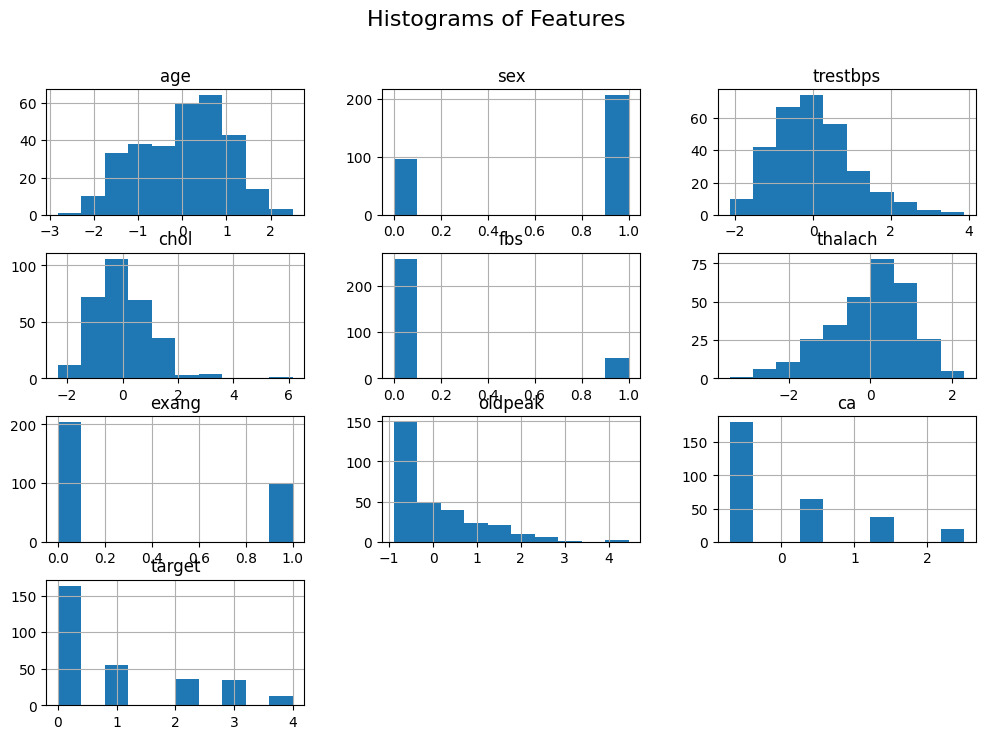

In [29]:
# Histogram
df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

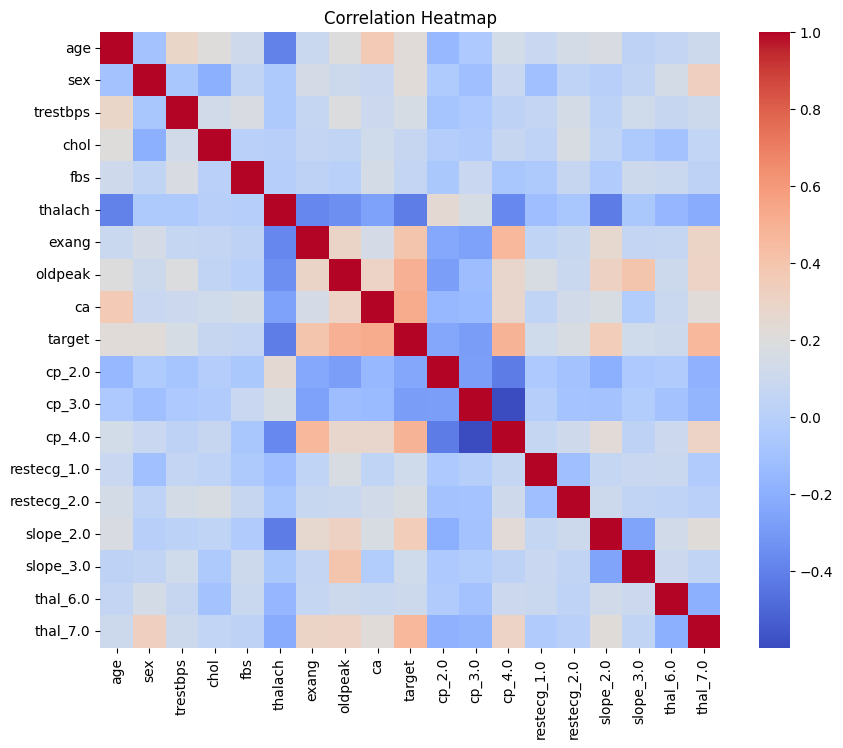

In [30]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

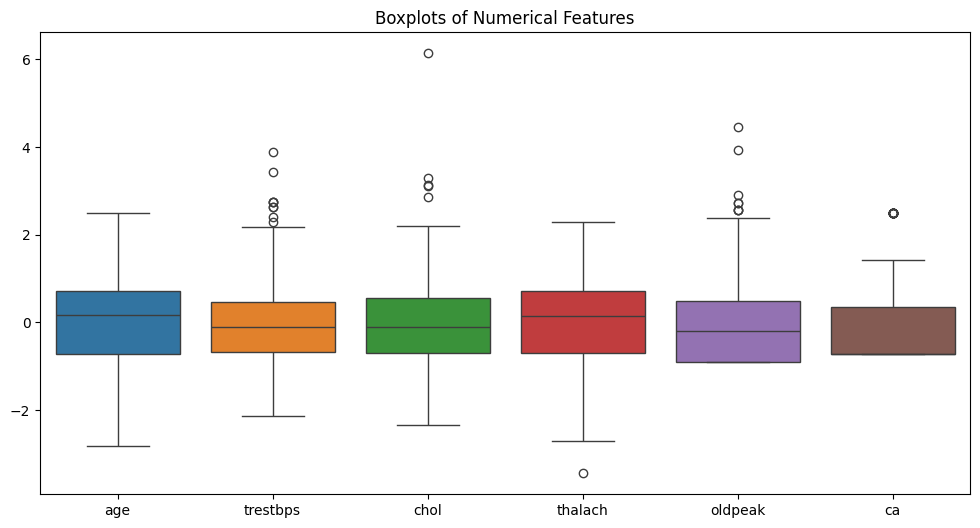

In [31]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplots of Numerical Features")
plt.show()

In [33]:
os.makedirs("data", exist_ok=True)
df.to_csv("data/cleaned_heart.csv", index=False)

print("Cleaned dataset saved at data/cleaned_heart.csv")
print("Final shape:", df.shape)


Cleaned dataset saved at data/cleaned_heart.csv
Final shape: (303, 19)
